<a href="https://colab.research.google.com/github/wsj20010128/ML_Notes/blob/main/01_kNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN**

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# raw_data_X: features
raw_data_X = [[3.393533211, 2.331273381],
        [3.110073483, 1.781539638],
        [1.343808831, 3.368360954],
        [3.582294042, 4.679179110],
        [2.280362439, 2.866990263],
        [7.423436942, 4.696522875],
        [5.745051997, 3.533989803],
        [9.172168622, 2.511101045],
        [7.792783481, 3.424088941],
        [7.939820817, 0.791637231]] 
        
# raw_data_y: labels
# 0 -> benign
# 1 -> malignant
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [34]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
X_train, y_train

(array([[3.39353321, 2.33127338],
        [3.11007348, 1.78153964],
        [1.34380883, 3.36836095],
        [3.58229404, 4.67917911],
        [2.28036244, 2.86699026],
        [7.42343694, 4.69652288],
        [5.745052  , 3.5339898 ],
        [9.17216862, 2.51110105],
        [7.79278348, 3.42408894],
        [7.93982082, 0.79163723]]), array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

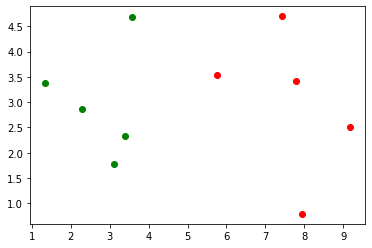

In [5]:
#         label==0 first_feature  label==0 second_feature
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
#         label==1 first_feature  label==1 second_feature
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.show()

In [6]:
# a new sample
x = np.array([8.093607318, 3.365731514])

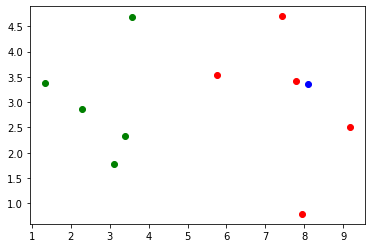

In [7]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN Process

### Euclidean Distance
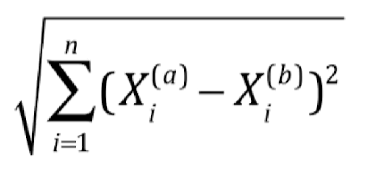

In [22]:
from math import sqrt
# distances = []
# for x_train in X_train:
#   d = sqrt(np.sum((x_train - x) ** 2))
#   distances.append(d)

distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [21]:
#     index of the nearest points
nearest = np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [14]:
k = 6

In [20]:
# first k elements in nearest
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [23]:
from collections import Counter

# count the number of the labels
votes = Counter(topK_y)
votes

Counter({0: 1, 1: 5})

In [27]:
predict_y = votes.most_common(1)[0][0]
predict_y

1